## Geographical data


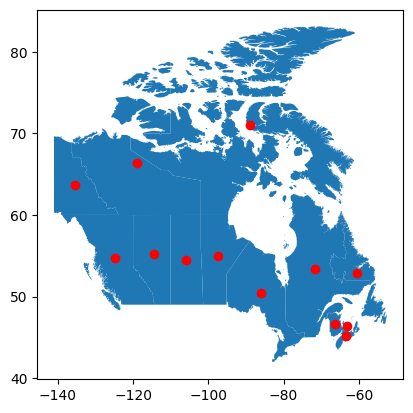

In [2]:
import geopandas as gpd

canada_gdf = gpd.read_file("data/canada/canada.geojson")
canada_gdf["centroid"]= canada_gdf["geometry"].apply(lambda x: x.centroid)
ax = canada_gdf.plot()
ax.scatter(canada_gdf["centroid"].x,canada_gdf["centroid"].y, color="red")
# this is used to get the weather data

## Gathering historical energy shares from nrcan

In [3]:
# import requests
# from data.canada import Provinces
# prov_abbr = [p.name.lower() for p in Provinces]
# prov_abbr
# for prov in prov_abbr:
#     url = f"https://oee.nrcan.gc.ca/corporate/statistics/neud/dpa/data_e/downloads/comprehensive/Excel/2020/res_{prov}_e_2.xls"
#     response = requests.get(url)
#     if response.status_code == 200:
#         with open(f"{prov}.xls","wb") as fo:
#             fo.write(response.content)
#     else:
#         print(f"Error: {response.status_code} for {prov}")

Error: 404 for nu
Error: 404 for nt
Error: 404 for yt


In [6]:
# from data.canada import Provinces
# prov_abbr = [p.name.lower() for p in Provinces]

# import pandas as pd

# prov_dfs = []
# for prov in prov_abbr:
#     try:
#         df = pd.read_excel(f"{prov}.xls", header=10, index_col=1, engine="openpyxl").drop(columns=["Unnamed: 0"])

#         keep_rows = ~df.iloc[:,0].isna()
#         df = df.loc[keep_rows,:]
#         df["province"] = prov
#         prov_dfs.append(df)
#     except FileNotFoundError:
#         print(f"File not found: {prov}.xls")


In [7]:
# all_provinces_df = pd.concat(prov_dfs).reset_index().set_index(["province","index"])
# valid_provs = all_provinces_df.index.get_level_values(0).unique()

ValueError: No objects to concatenate

In [ ]:
# all_provinces_df = all_provinces_df.reset_index()
# for prov in valid_provs:
#     full_prov_name = getattr(Provinces, prov.upper())
#     all_provinces_df.loc[all_provinces_df["province"] == prov, "province"] = full_prov_name.value
# all_provinces_df.head()

province                  index        2000        2001        2002  \
0  Alberta  Total Energy Use (PJ)  191.287287  172.229202  189.753525   
1  Alberta          Space Heating  129.354293  109.897501  125.597115   
2  Alberta          Water Heating   40.143670   38.519403   39.932431   
3  Alberta             Appliances   16.371148   17.758458   17.948250   
4  Alberta               Lighting    5.357538    5.939873    6.060255   

         2003        2004        2005        2006        2007  ...  \
0  190.990000  190.468961  177.687157  180.631783  210.340116  ...   
1  126.551963  124.982063  112.281967  115.007472  138.023797  ...   
2   41.653074   42.480270   42.072077   41.311922   47.400116  ...   
3   16.843408   17.075159   17.365945   17.920086   18.478491  ...   
4    5.767952    5.809380    5.900140    6.029337    6.086117  ...   

         2011        2012        2013        2014        2015        2016  \
0  206.628000  205.506000  207.430415  207.558334  201.199000  177.307592   
1  134.482424  133.461557  136.774303  138.350851  129.940512  112.760950   
2   46.650604   46.522575   45.102172   43.320560   44.981458   38.811795   
3   19.217233   19.338500   19.556548   19.841032   20.213999   19.983799   
4    6.091246    6.006779    5.843092    5.789150    5.733212    5.629053   

         2017        2018        2019        2020  
0  209.799529  217.519359  217.719789  215.665468  
1  137.751822  147.708121  147.577372  141.827502  
2   46.193291   44.590778   43.718298   45.532896  
3   20.007068   19.598546   20.776689   22.089604  
4    5.503333    5.306592    5.535231    5.920701  

[5 rows x 23 columns]

# Batch run

In [1]:
from mesa.batchrunner import batch_run
from components.model import TechnologyAdoptionModel
from components.technologies import merge_heating_techs_with_share
import pandas as pd
from batch import (
    transform_dataframe_for_plotly,
    plotly_lines_with_error,
    transform_dict_column,
    BatchResult
)
import plotly.graph_objects as go


batch_parameters = {
        "N": [200],
        "province": ["Canada"],  # , "Alberta", "Ontario"],
        "random_seed": range(20, 28),
        "start_year": [2000],
        "interact": [False],
        "n_segregation_steps": [40],
    }

b_result = BatchResult.from_parameters(batch_parameters)
b_result_path = b_result.save()

results_dir=WindowsPath('results/feature_parameter_fit/2a1418d7d179656c5ecb265cecb482a5') does not exist. Running model.


100%|██████████| 8/8 [00:27<00:00,  3.46s/it]


In [2]:
import seaborn as sns
b_result.appliance_age_fig()

c:\src\canadopt\abetam\batch.py:545: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


<Axes: xlabel='year', ylabel='Appliance age'>

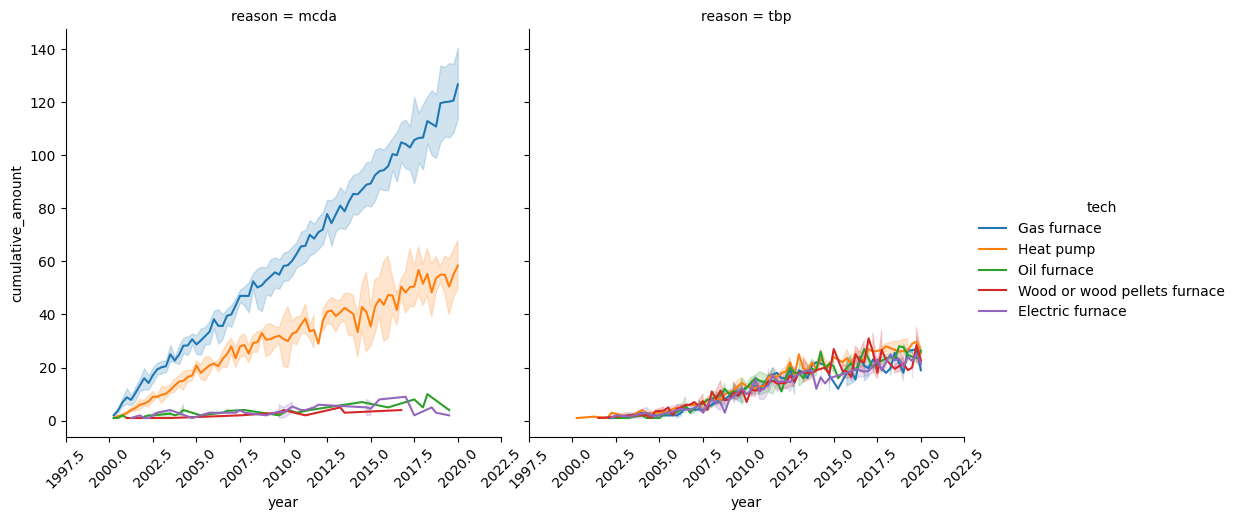

In [3]:
b_result.adoption_details_fig()

In [4]:
b_result.adoption_details_fig_facet(n_facet_cols=3)

## Visualising mutliple confidence intervals as shaded areas

In [5]:
import config
config.TECHNOLOGY_COLORS

{'Gas furnace': '#f7b799',
 'Oil furnace': '#f3d1bf',
 'Wood or wood pellets furnace': '#dde1f4',
 'Electric furnace': '#c4e8cb',
 'Heat pump': '#b0dbda'}

In [6]:

# fig = adoption_plot_with_quantiles(df2plot, [0.68], mid_line="mean")
# fig.update_layout(width=800)

In [7]:
import config
from matplotlib.colors import to_hex
import plotly.express as px
hex_colors = []
technology_colors = config.TECHNOLOGY_COLORS.copy()
for k,c in config.TECHNOLOGY_COLORS.items():
    c_hex = c
    # c_tuple = px.colors.unlabel_rgb(c)
    # c_tuple = [color/255 for color in c_tuple]
    # c_hex = to_hex(c_tuple)
    hex_colors.append(c_hex)
    technology_colors[k] = c_hex

technology_colors



{'Gas furnace': '#f7b799',
 'Oil furnace': '#f3d1bf',
 'Wood or wood pellets furnace': '#dde1f4',
 'Electric furnace': '#c4e8cb',
 'Heat pump': '#b0dbda'}

In [8]:
b_result.tech_shares_fig()

In [9]:
b_result.save()

WindowsPath('results/feature_parameter_fit/2a1418d7d179656c5ecb265cecb482a5')

## Loading a batch result

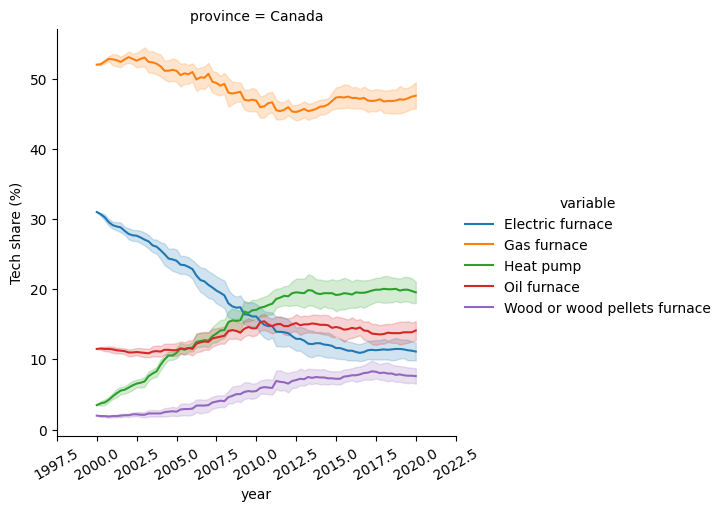

In [11]:
import seaborn as sns
import plotly.express as px
from batch import BatchResult

r_result = BatchResult.from_directory(b_result_path)

ax = r_result.tech_shares_fig()
ax


# Segregation

In [12]:
from components.model import TechnologyAdoptionModel
from components.technologies import merge_heating_techs_with_share
heating_techs = merge_heating_techs_with_share()

In [13]:
n_agents = 500
n_segregation_steps = 40

model = TechnologyAdoptionModel(n_agents, "Ontario")
income_segregation_dfs = model.perform_segregation(n_segregation_steps, capture_attribute="disposable_income")

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

fig, ax = plt.subplots(figsize=(3,2))

img = income_segregation_dfs[-1].values
ax.imshow(img, label="income")
ax.set_yticks((0,img.shape[0]))
ax.set_xticks((0,img.shape[1]))
ax,img.shape,

(<Axes: >, (23, 23))

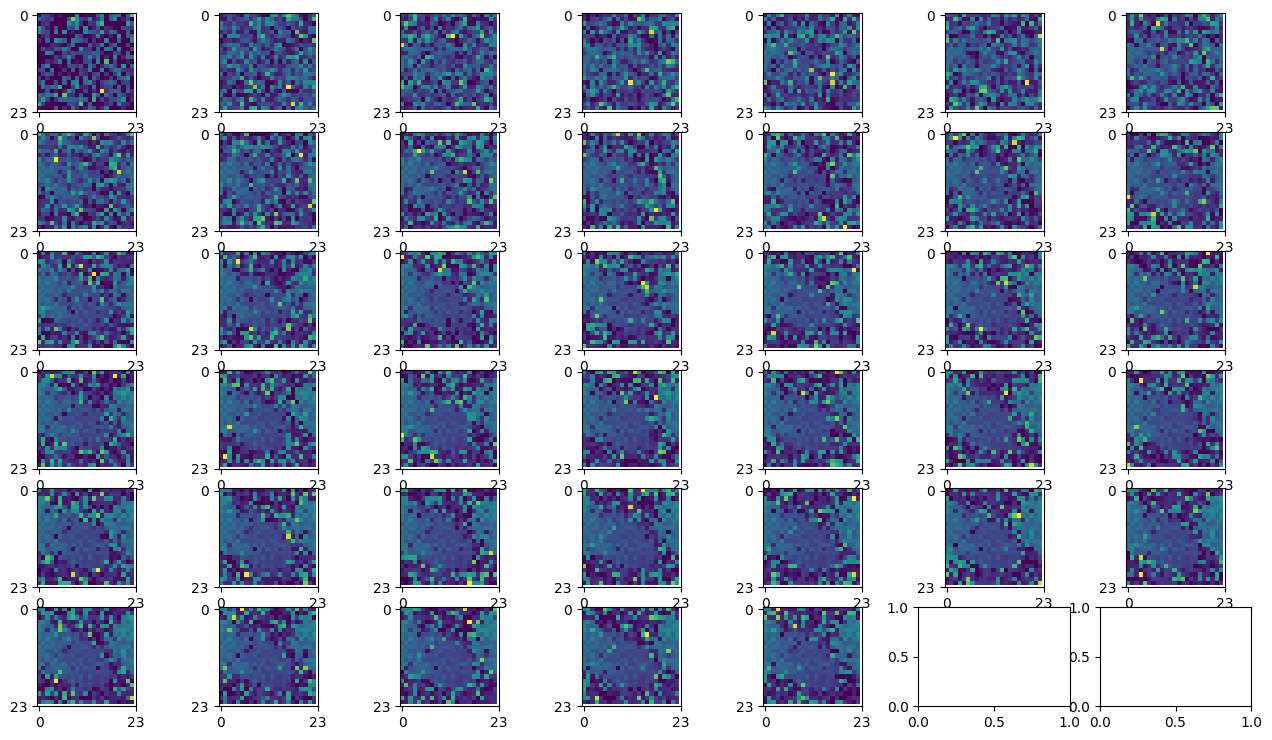

In [15]:
n_rows = int(n_segregation_steps**(1/2)) 
n_cols = n_rows +1


m_idx = list(product(range(n_rows), range(n_cols)))

fig, axes = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(16,9))

for step, income_df in enumerate(income_segregation_dfs):
    row = m_idx[step][0]
    col = m_idx[step][1]

    # values are image data
    img = income_df.values
    axes[row][col].imshow(img)

    # set ticks to only show size
    # (because the axis here, are not really relevant)
    axes[row][col].set_yticks([0,img.shape[0]])
    axes[row][col].set_xticks([0,img.shape[1]])

    # relevant_ticks = ((income_df.values.shape()))

# Parameter fit


In [18]:
from mesa.batchrunner import batch_run
from components.model import TechnologyAdoptionModel
from components.probability import beta_with_mode_at
from components.technologies import merge_heating_techs_with_share
from data.canada import nrcan_tech_shares_df

import plotly.express as px
import pandas as pd
import numpy as np
from batch import (
    transform_dict_column,
)
import plotly.graph_objects as go
import seaborn as sns

province = "Canada"
start_year = 2000

heat_techs_df = merge_heating_techs_with_share(start_year=start_year, province=province)
historic_tech_shares = nrcan_tech_shares_df.copy()
historic_tech_shares.index = historic_tech_shares.index.swaplevel()
h_tech_shares = historic_tech_shares.loc[province,:]/100


n_steps = 80
def comparison_plot(mean_df):
    historic_tech_shares = nrcan_tech_shares_df.copy()
    historic_tech_shares.index = historic_tech_shares.index.swaplevel()
    h_tech_shares = historic_tech_shares.loc[province,:]/100

    h_tech_shares_long = h_tech_shares.melt(ignore_index=False)
    h_tech_shares_long["comparison"] = "historic"

    mean_df.long = mean_df.melt(ignore_index=False)
    mean_df.long["comparison"] = "modelled"

    comp_df = pd.concat([h_tech_shares_long,mean_df.long])
    ax = sns.lineplot(comp_df.reset_index(),x="index",hue="variable", y="value", style="comparison")
    ax.legend(loc=(1,.25))
    return ax.get_figure()

def get_adoption_details_from_batch_results(model_vars_df):
    adoption_detail = model_vars_df[["Step","RunId","Adoption details","AgentID"]]
    adoption_detail.loc[:,["tech","reason"]] = pd.DataFrame.from_records(adoption_detail["Adoption details"].values)
    adoption_detail = adoption_detail.drop("Adoption details", axis=1)
    adoption_detail["amount"] = 1
    drop_rows = adoption_detail["tech"].apply(lambda x: x is None)
    adoption_detail = adoption_detail.loc[~drop_rows,:]

    adoption_detail = adoption_detail.groupby(["Step","RunId","tech","reason"]).sum().reset_index()

    # get cumulative sum
    adoption_detail["cumulative_amount"] = adoption_detail.groupby(["RunId","tech","reason"]).cumsum()["amount"]
    return adoption_detail

In [19]:
techs = heat_techs_df.index.to_list()
tech_mode_map = dict(zip(techs,[0.5]*len(techs)))

batch_parameters = {
    "N": [200],
    "province": [province],  # , "Alberta", "Ontario"],
    "random_seed": range(20, 28),
    "start_year": start_year,
    "tech_attitude_dist_func":[beta_with_mode_at], 
    "tech_attitude_dist_params":[tech_mode_map],
    "n_segregation_steps" : [30],
    "interact" : [True],
}

adoption_share_dfs = []
adoption_detail_dfs = []

mode_shift = 0.15
best_abs_diff = 1e12
greatest_diff_sum = None
for i in range(7):
    results = batch_run(
        TechnologyAdoptionModel,
        batch_parameters,
        number_processes=None,
        max_steps=80,
        data_collection_period=1,
    )
    df = pd.DataFrame(results)
    df_no_dict, columns = transform_dict_column(df, dict_col_name="Technology shares")
    df2plot = df_no_dict[["RunId", "Step", *columns]].drop_duplicates()
    df2plot = df2plot.melt(id_vars=["RunId", "Step"]).pivot(
        columns=["variable", "RunId"], index="Step", values="value"
    )
    
    adoption_detail_dfs.append(get_adoption_details_from_batch_results(df))

    mean_df = pd.DataFrame()
    for col in df2plot.columns.get_level_values(0).unique():
        mean_df.loc[:,col] = df2plot[col].mean(axis=1)

    mean_df.index = TechnologyAdoptionModel.steps_to_years_static(batch_parameters["start_year"],range(81),1/4)
    diff_sum = (h_tech_shares-mean_df).sum()
    
    current_abs_diff = diff_sum.abs().sum()
    print(i,current_abs_diff)
    
    if greatest_diff_sum is not None:
        if diff_sum.abs().sum() > greatest_diff_sum.abs().sum():
            greatest_diff_sum = diff_sum.copy()
    else:
        greatest_diff_sum = diff_sum.copy()


    if best_abs_diff < current_abs_diff:
        print("Performance degradation. Scaling down mode_shift")
        mode_shift = mode_shift/2
        att_update = att_update/2
        tech_mode_map = best_modes.to_dict()
    else:
        best_abs_diff = current_abs_diff
        if "new_modes" in locals():
            best_modes = new_modes.copy()
        att_update = diff_sum/greatest_diff_sum.abs().max()*mode_shift
    new_modes = pd.Series(tech_mode_map) + att_update


    mean_df["iteration"] = i
    adoption_share_dfs.append(mean_df)

    new_modes[new_modes<=0] = 0.05
    new_modes[new_modes>=1] = 0.95
    debug_info = pd.concat([diff_sum.rename("diff_sum"),new_modes.rename("new_modes")], axis=1,)
    print(i,debug_info)
    tech_mode_map = new_modes.to_dict()
    batch_parameters["tech_attitude_dist_params"] = [tech_mode_map]

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:25<00:00,  3.21s/it]


0 5.978260044052733
0                               diff_sum  new_modes
Electric furnace              2.955810   0.650000
Gas furnace                  -1.139284   0.442184
Heat pump                    -1.478209   0.424985
Oil furnace                  -0.371877   0.481128
Wood or wood pellets furnace  0.033080   0.501679


100%|██████████| 8/8 [00:23<00:00,  2.94s/it]


1 3.3945100440527343
1                               diff_sum  new_modes
Electric furnace              1.617060   0.732062
Gas furnace                  -0.919284   0.395533
Heat pump                    -0.580709   0.395515
Oil furnace                  -0.197502   0.471105
Wood or wood pellets furnace  0.079955   0.505736


100%|██████████| 8/8 [00:23<00:00,  2.90s/it]


2 2.235760044052733
2                               diff_sum  new_modes
Electric furnace              1.021435   0.783897
Gas furnace                  -0.258034   0.382438
Heat pump                    -0.631334   0.363476
Oil furnace                  -0.228752   0.459497
Wood or wood pellets furnace  0.096205   0.510618


100%|██████████| 8/8 [00:23<00:00,  2.98s/it]


3 1.563068814599598
3                               diff_sum  new_modes
Electric furnace             -0.381065   0.764559
Gas furnace                   0.668216   0.416348
Heat pump                    -0.400709   0.343141
Oil furnace                   0.011248   0.460068
Wood or wood pellets furnace  0.101830   0.515786


100%|██████████| 8/8 [00:26<00:00,  3.34s/it]


4 1.6720100440527335
Performance degradation. Scaling down mode_shift
4                               diff_sum  new_modes
Electric furnace              0.673935   0.774228
Gas furnace                  -0.391784   0.399393
Heat pump                    -0.333209   0.353309
Oil furnace                  -0.111252   0.459782
Wood or wood pellets furnace  0.161830   0.513202


100%|██████████| 8/8 [00:27<00:00,  3.45s/it]


5 1.4220070265035354
5                               diff_sum  new_modes
Electric furnace              0.580810   0.788965
Gas furnace                  -0.439909   0.388231
Heat pump                    -0.271334   0.346424
Oil furnace                   0.017498   0.460226
Wood or wood pellets furnace  0.112455   0.516056


100%|██████████| 8/8 [00:26<00:00,  3.25s/it]


6 0.9055688145995977
6                               diff_sum  new_modes
Electric furnace             -0.249815   0.782627
Gas furnace                   0.215091   0.393689
Heat pump                    -0.203209   0.341268
Oil furnace                   0.071873   0.462050
Wood or wood pellets furnace  0.165580   0.520257


In [20]:
l_hist_shares = historic_tech_shares.loc[province,:].melt(ignore_index=False).reset_index()
l_hist_shares["iteration"] = "historic"
l_hist_shares["value"] *= 0.01

In [21]:
def parameter_fit_results(dfs: list[pd.DataFrame], second_id_var="iteration"):
    results = pd.concat(dfs)
    results.reset_index(names=["year"], inplace=True)
    long_results = results.melt(id_vars=["year",second_id_var])
    return long_results

pfit_res = parameter_fit_results(adoption_share_dfs)
pfit_res_historic = pd.concat( [pfit_res, l_hist_shares])

fig = px.line(pfit_res, x="year", y="value", color="variable", line_dash="iteration", template="plotly", )

def update_trace_opacity(trace: go.Trace):
    # TODO: add this variable in loop above
    n_fit_iterations = 10
    iteration = trace.name.split(",")[-1]
    if iteration == " historic":
        opacity = 1
        
    else:
        try:
            opacity = int(iteration) * 1/n_fit_iterations
        except:
            pass
            opacity = float(iteration.strip())


    trace.opacity = opacity


fig.for_each_trace(lambda t: update_trace_opacity(t))

for i,tech in enumerate(historic_tech_shares.loc[province,:].columns):
    fig.add_trace(
        go.Scatter(
            x=historic_tech_shares.loc[province,tech].index,
            y=historic_tech_shares.loc[province,tech].values/100,
            mode="lines",
            name=f"{tech}, historic",
            line=dict(dash="solid", width=3, color=px.colors.qualitative.Plotly[i]),
        )
    )

fig.update_layout(width=800)

In [22]:
adoption_detail_df = pd.concat(adoption_detail_dfs)
sns.relplot(adoption_detail_df,kind="line", x="Step", y="cumulative_amount", hue="tech", col="reason")
# sns.lineplot(adoption_detail_df, x="Step", y="cumulative_amount", hue="tech")

## Draw dependent random parameters (mcda weights)

weights for mcda need to be diverse across agents, and have to add up to 1.
This can be achieved, by drawing one weight $w_0$ from an assumed distribution D between 0 and 1, and then drawing $w_i$ from the same distribution with adapted boundaries as $1 - w_0$ for the upper bound. More formally, the equation for the upper bound of $w_i$ is:
$$ 1- \sum_{i-1} w_{i-1} $$



In [23]:
from components.model import get_income_and_attitude_weights

all_dfs = []
for p_mode in [0.5, 0.7, 0.9]:
    _, weights_df = get_income_and_attitude_weights(10000, price_weight_mode=p_mode)
    weights_df["mode"] = p_mode
    # print(weights_df.head())
    all_dfs.append(weights_df.copy())

all_df = pd.concat(all_dfs)

fig = px.histogram(
    all_df.melt(id_vars=["mode"]),
    facet_col="variable",
    facet_row="mode",
    category_orders={
        "variable": ["cost_norm", "emissions_norm", "attitude"],
        "mode": [0.5, 0.7, 0.9][::-1],
    },
)
fig.update_layout(template="plotly", xaxis_title="test", width=800)

## parameter fit for mcda-weight's mode

In [24]:
# new_modes
# Electric furnace                0.766605
# Gas furnace                     0.504180
# Heat pump                       0.146975
# Oil furnace                     0.568051
# Wood or wood pellets furnace    0.514014

In [25]:
from batch import transform_dict_column
province = "Canada"
start_year = 2000

batch_parameters = {
    "N": [150],
    "province": [province],  # , "Alberta", "Ontario"],
    "random_seed": range(20, 28),
    "tech_attitude_dist_func":[beta_with_mode_at], 
    "tech_attitude_dist_params":[best_modes.to_dict()],
    "n_segregation_steps": [30],
    "interact": [False],
}

adoption_dfs = []
for p_mode in [0.925, 0.9, 0.875, 0.85, ]:

    batch_parameters["price_weight_mode"] = p_mode

    results = batch_run(
        TechnologyAdoptionModel,
        batch_parameters,
        number_processes=None,
        max_steps=80,
        data_collection_period=1,
    )
    df = pd.DataFrame(results)
    df_no_dict, columns = transform_dict_column(df, dict_col_name="Technology shares")
    df2plot = df_no_dict[["RunId", "Step", *columns]].drop_duplicates()
    df2plot = df2plot.melt(id_vars=["RunId", "Step"]).pivot(
        columns=["variable", "RunId"], index="Step", values="value"
    )
    
    mean_df = pd.DataFrame()
    for col in df2plot.columns.get_level_values(0).unique():
        mean_df.loc[:,col] = df2plot[col].mean(axis=1)

    mean_df.index = TechnologyAdoptionModel.steps_to_years_static(start_year,range(81),1/4)
    mean_df["p_mode"] = p_mode
    adoption_dfs.append(mean_df)
    diff_sum = (h_tech_shares-mean_df).sum()

    
    total_abs_diff = diff_sum.abs().sum()
    print(p_mode,total_abs_diff)
    # print(f"finished iteration {i}")

mcda_fit_results = pd.concat(adoption_dfs)



100%|██████████| 8/8 [00:22<00:00,  2.81s/it]


0.925 1.7657570265035356


100%|██████████| 8/8 [00:20<00:00,  2.61s/it]


0.9 1.479090359836869


100%|██████████| 8/8 [00:21<00:00,  2.68s/it]


0.875 1.417423693170202


100%|██████████| 8/8 [00:21<00:00,  2.64s/it]


0.85 1.4424236931702017


In [26]:
pfit_res = parameter_fit_results(adoption_dfs, second_id_var="p_mode")
pfit_res_historic = pd.concat( [pfit_res, l_hist_shares])
pfit_res_historic["p_mode"][pfit_res_historic["p_mode"].isna()] = "historic"
fig = px.line(pfit_res_historic, x="year", y="value", color="variable", line_dash="p_mode", template="plotly", )

fig.for_each_trace(lambda t: update_trace_opacity(t))

fig.update_layout(width=800)

C:\Users\dhuck\AppData\Local\Temp\ipykernel_12728\3287833502.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dhuck\AppData\Local\Temp\ipykernel_12728\3287833502.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'historic' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [27]:
from batch import BatchResult
best_guess_parameters = {
    "N": [200],
    "province": [province],  # , "Alberta", "Ontario"],
    "random_seed": range(20, 28),
    "tech_attitude_dist_func":[beta_with_mode_at], 
    "tech_attitude_dist_params":[best_modes.to_dict()],
    "n_segregation_steps": [30],
    "interact": [False],
    "price_weight_mode": 0.875
}
results = batch_run(
        TechnologyAdoptionModel,
        best_guess_parameters,
        number_processes=None,
        max_steps=80,
        data_collection_period=1,
    )


100%|██████████| 8/8 [00:23<00:00,  2.96s/it]


In [28]:
# best_guess_parameters.pop("tech_attitude_dist_func")
bResult = BatchResult(best_guess_parameters, results)

TypeError: Object of type function is not JSON serializable

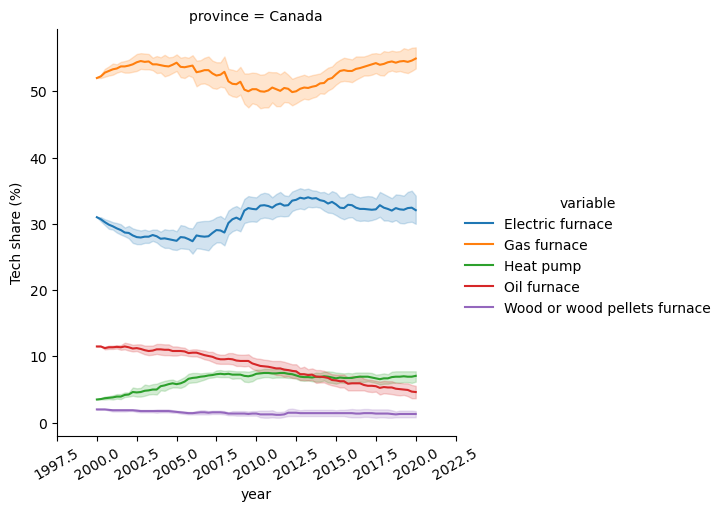

In [ ]:
ax = bResult.tech_shares_fig()

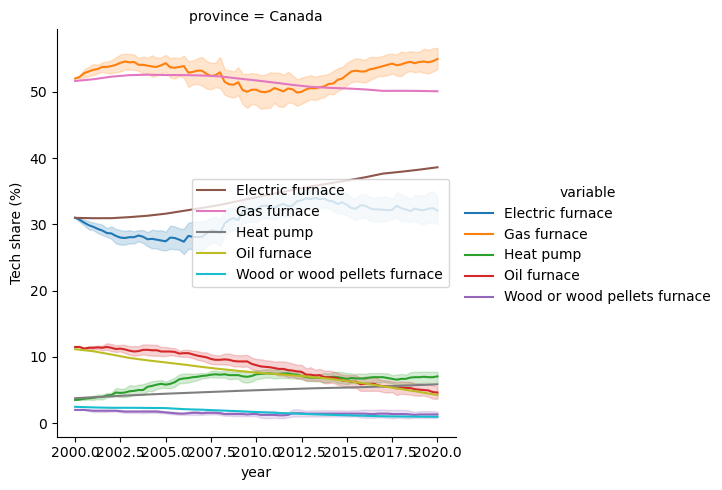

In [ ]:
ax_ = historic_tech_shares.loc[province,:].plot(kind="line", ax=ax.ax)
ax_.figure

# Convert outputs to copper inputs

In [31]:
# TODO: create batch run from 2020 until 2050
from batch import BatchResult

sample_params = {
    "N":50,
    "province": ["Ontario","Alberta"],
    "random_seed":[1,2,3,4],
    "start_year": 2020,
}

bResult = BatchResult.from_parameters(sample_params, max_steps=(2050-2020)*4)



results_dir=WindowsPath('results/feature_parameter_fit/fcca595298c317bc68ac69731d3a95a4') does not exist. Running model.


100%|██████████| 8/8 [00:13<00:00,  1.64s/it]


In [42]:
model_demand = bResult.mean_carrier_demand_df["Electricity"]
model_demand = model_demand.reset_index()
model_demand.head()
model_demand["COPPER_colnames"] = model_demand["province"]+"."+model_demand["year"].astype(int).astype(str)
model_demand = model_demand[["hour","Electricity","COPPER_colnames"]].pivot(index="hour",columns=["COPPER_colnames"], values="Electricity")
model_demand /= 1000 # kWh -> MWh
model_demand.head()

COPPER_colnames Alberta.2020 Alberta.2025 Alberta.2030 Alberta.2035  \
hour                                                                  
0                1344.924451  1309.679132  1433.623204  1504.568904   
1                1348.767221  1313.421198  1437.719408  1508.867816   
2                 1354.43025   1318.93582  1443.755917  1515.203054   
3                1359.374164  1323.750174  1449.025886  1520.733818   
4                1366.363061  1330.555918  1456.475706  1528.552307   

COPPER_colnames Alberta.2040 Alberta.2045 Alberta.2050 Ontario.2020  \
hour                                                                  
0                1433.815279  1540.100445   1451.69987  5205.760049   
1                1437.912031  1544.500879  1455.847722  5220.634146   
2                1443.949349  1550.985729  1461.960347  5242.553868   
3                1449.220024  1556.647106  1467.296766  5261.690134   
4                1456.670842  1564.650235  1474.840521  5288.741854   

COPPER_colnames Ontario.2025 Ontario.2030 Ontario.2035 Ontario.2040  \
hour                                                                  
0                4938.219235  4096.261781  4134.768412  3828.692064   
1                4952.328904  4107.965777   4146.58243  3839.631549   
2                4973.122101  4125.213771  4163.992563  3855.752897   
3                4991.274892  4140.271544  4179.191886  3869.827089   
4                5016.936338   4161.55776  4200.678201  3889.722879   

COPPER_colnames Ontario.2045 Ontario.2050  
hour                                       
0                4212.043771   4212.30873  
1                4224.078584    4224.3443  
2                4241.814098  4242.080929  
3                4257.297483  4257.565288  
4                4279.185359  4279.454541

In [45]:
projection_df = pd.read_csv("data/canada/timeseries/end-use-demand-2023.csv", index_col=0).query("Scenario=='Global Net-zero' and Variable=='Electricity'  and Sector!='Total End-Use'")
valid_years = (projection_df["Year"] % 5 == 0) & (projection_df["Year"]> 2019) | (projection_df["Year"] == 2021)

projection_df = projection_df.loc[valid_years,:]
projection_df.loc[:,"COPPER_colnames"] = projection_df["Region"] + "." + projection_df["Year"].astype("str")
projection_df.head()

Scenario                     Region     Variable  Year    Value  \
12217  Global Net-zero                    Alberta  Electricity  2020  60.9693   
12218  Global Net-zero           British Columbia  Electricity  2020  52.0534   
12219  Global Net-zero                   Manitoba  Electricity  2020  24.2842   
12220  Global Net-zero              New Brunswick  Electricity  2020  10.8075   
12221  Global Net-zero  Newfoundland and Labrador  Electricity  2020   8.8297   

           Sector                 COPPER_colnames  
12217  Commercial                    Alberta.2020  
12218  Commercial           British Columbia.2020  
12219  Commercial                   Manitoba.2020  
12220  Commercial              New Brunswick.2020  
12221  Commercial  Newfoundland and Labrador.2020

In [46]:
# group to Residential and rest
def agg_sectors(sector):
    if sector== "Residential":
        return sector
    else: 
        return "Comm_Trans_Industr"

projection_df["agg_sector"] = projection_df["Sector"].apply(agg_sectors)
annual_sector_PJ_prov_demand = projection_df.groupby(["agg_sector","COPPER_colnames"])["Value"].sum().reset_index()
annual_sector_PJ_prov_demand.head()

agg_sector COPPER_colnames       Value
0  Comm_Trans_Industr    Alberta.2020  242.084200
1  Comm_Trans_Industr    Alberta.2021  233.761500
2  Comm_Trans_Industr    Alberta.2025  248.149100
3  Comm_Trans_Industr    Alberta.2030  282.341467
4  Comm_Trans_Industr    Alberta.2035  307.606148

In [47]:
# read copper demand profiles
copper_demand = pd.read_csv("data/canada/timeseries/COPPER_BAU_demand.csv", index_col=0)

copper_normalized_profiles = copper_demand/copper_demand.sum()
copper_normalized_profiles.head()

Alberta  British Columbia  Manitoba  New Brunswick  \
0  0.000136          0.000165  0.000186       0.000142   
1  0.000135          0.000171  0.000186       0.000138   
2  0.000133          0.000169  0.000184       0.000134   
3  0.000132          0.000165  0.000180       0.000130   
4  0.000131          0.000161  0.000172       0.000124   

   Newfoundland and Labrador  Nova Scotia   Ontario  Prince Edward Island  \
0                   0.000152     0.000130  0.000120              0.000137   
1                   0.000149     0.000124  0.000116              0.000131   
2                   0.000145     0.000119  0.000113              0.000125   
3                   0.000140     0.000118  0.000109              0.000119   
4                   0.000135     0.000124  0.000105              0.000116   

     Quebec  Saskatchewan  
0  0.000143      0.000149  
1  0.000136      0.000148  
2  0.000133      0.000146  
3  0.000128      0.000143  
4  0.000125      0.000141

In [48]:
# use annual demand to scale normalized profiles
test = {}
for i, row in annual_sector_PJ_prov_demand.query("agg_sector!='Residential'").iterrows():
    province = row["COPPER_colnames"].split(".")[0]
    if province not in copper_normalized_profiles.columns:
        continue
    rest_demand = row["Value"] * copper_normalized_profiles[province]
    test[row["COPPER_colnames"]] = rest_demand

In [49]:
rest_demand_df = pd.DataFrame(test)
#                   J->Wh, P -> M
rest_demand_df *= (1/3600)*1e9
rest_demand_df.head()

Alberta.2020  Alberta.2021  Alberta.2025  Alberta.2030  Alberta.2035  \
0   9165.078962   8849.989408   9394.690343  10689.181034  11645.677973   
1   9084.586621   8772.264342   9312.181438  10595.303260  11543.399761   
2   8939.384750   8632.054418   9163.341846  10425.955119  11358.897889   
3   8900.716860   8594.715906   9123.705216  10380.856973  11309.764238   
4   8823.381081   8520.038881   9044.431955  10290.660681  11211.496936   

   Alberta.2040  Alberta.2045  Alberta.2050  British Columbia.2020  \
0  12350.055605  13671.181466  15452.225105            6245.840308   
1  12241.591193  13551.114262  15316.515879            6498.097453   
2  12045.929903  13334.522443  15071.707077            6402.554331   
3  11993.824450  13276.843099  15006.513429            6249.335788   
4  11889.613545  13161.484413  14876.126133            6096.117245   

   British Columbia.2021  ...   Quebec.2045   Quebec.2050  Saskatchewan.2020  \
0            6519.780833  ...  27346.776063  28397.180268        2877.452834   
1            6783.101895  ...  26106.144396  27108.895279        2857.128527   
2            6683.368282  ...  25413.627867  26389.778822        2812.571393   
3            6523.429624  ...  24619.420217  25565.065235        2765.669146   
4            6363.490965  ...  23915.717665  24834.333094        2716.421787   

   Saskatchewan.2021  Saskatchewan.2025  Saskatchewan.2030  Saskatchewan.2035  \
0        2857.754147        3243.614950        3606.923302        4254.078055   
1        2837.568978        3220.704331        3581.446528        4224.030234   
2        2793.316877        3170.477205        3525.593600        4158.156165   
3        2746.735717        3117.606545        3466.801044        4088.815039   
4        2697.825499        3062.092353        3405.068861        4016.006857   

   Saskatchewan.2040  Saskatchewan.2045  Saskatchewan.2050  
0        4879.722289        5454.051424        6166.709504  
1        4845.255356        5415.527833        6123.152197  
2        4769.693235        5331.072269        6027.661178  
3        4690.154159        5242.171676        5927.144316  
4        4606.638130        5148.826052        5821.601610  

[5 rows x 80 columns]

In [51]:
common_cols = set(rest_demand_df.columns).intersection(model_demand.columns)
# set(rest_demand_df.columns).difference(model_demand.columns)
copper_input = rest_demand_df.loc[:,list(common_cols)] + model_demand
copper_input

Alberta.2020  Alberta.2025  Alberta.2030  Alberta.2035  Alberta.2040  \
0     10510.003413  10704.369475  12122.804239  13150.246877  13783.870883   
1     10433.353841  10625.602636  12033.022668  13052.267577  13679.503224   
2        10293.815  10482.277667  11869.711037  12874.100943  13489.879252   
3     10260.091024  10447.455389   11829.88286  12830.498056  13443.044475   
4     10189.744142  10374.987873  11747.136387  12740.049244  13346.284388   
...            ...           ...           ...           ...           ...   
8755  10583.696071  10760.193403  12170.157962  13185.440508  13774.935073   
8756  10575.503096  10752.012882  12161.028728  13175.675441  13765.090201   
8757  10506.379149  10680.533999  12079.189916  13085.995153  13668.523482   
8758  10588.876334  10764.024394  12173.304307   13187.63823  13773.795352   
8759  10757.656905   10935.90568  12367.944551  13398.757457    13995.0379   

      Alberta.2045  Alberta.2050  Ontario.2020  Ontario.2025  Ontario.2030  \
0     15211.281911  16903.924975   16267.71546  17181.417938  19685.079323   
1     15095.615141  16772.363601  15926.174816  16801.053363  19194.513678   
2     14885.508172  16533.667424  15660.618818  16503.672943  18806.642831   
3     14833.490206  16473.810195  15324.029731  16128.114495  18320.402471   
4     14726.134648  16350.966653  14988.462198  15752.434639  17830.675472   
...            ...           ...           ...           ...           ...   
8755  15187.922313  16794.863923    17582.0142  18400.581972  20610.714082   
8756  15177.173028  16783.627042  17810.997325  18656.617309  20943.634938   
8757  15069.850535   16659.71007  18131.743057  19004.170163  21366.352051   
8758  15185.650285  16786.094724  18782.247555  19711.315171   22232.60787   
8759  15429.789491  17057.311552  18521.330047   19409.06594  21811.917938   

      Ontario.2035  Ontario.2040  Ontario.2045  Ontario.2050  
0     24441.009654  28501.964555  31973.830337  34423.812009  
1     23798.559263  27717.934461  31091.384055  33462.436935  
2     23288.255162  27092.852105  30387.652225  32695.043509  
3     22650.455576  26313.494376  29510.384652   31739.00003  
4     22006.287965  25524.581657  28622.220195  30770.533386  
...            ...           ...           ...           ...  
8755  25303.275908  29207.845067  32740.642525   35152.07487  
8756  25740.736935  29743.160576  33343.269845  35809.051294  
8757   26280.51765  30388.220822   34068.20949  36594.602678  
8758   27390.21196  31717.950356  35562.896327  38215.397717  
8759  26822.567062  31008.675812  34763.268358  37339.134559  

[8760 rows x 14 columns]

ModuleNotFoundError: No module named 'abetam'